# 📊 **Data Mining Preliminary Project**

**Group Members**
- Nathanael Chris Abrigo
- Dwight Kenneth Cruz
- Joshua Kyle Kessel Entrata
- Edjin Jerney Payumo

### Setup

#### **Importing Libraries**

In [1]:
### Importing Libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Setup for the notebook
pd.set_option('display.max_columns', None)
%matplotlib inline


#### Load the preprocessed dataset

In [2]:
# Loading the 2023 FIES Dataset Volume 2
final_fies = pd.read_csv('../data/processed/final_fies.csv')

final_fies

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,TOTDIS,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR,SOCIAL_CLASS
0,13,39,105930,3900,4.0,352200,0,352200,0,0,0,0,0,0,0,0,0,2276.0,0,0,0,0,0,0,0,0,0,0,0,0,27979.0,30420.0,16640.0,2020.0,4620.0,3340.0,8710.0,1595.0,2490.0,0.0,5475.0,0.0,0.0,2470.0,0.0,0.0,0.0,0.0,0.0,0,0,105759.0,81565.0,187324.0,2370,36660,0,15000,3000,18000,2674,1860,6344,8200,0,0,8166,7122,0,0,0,900,0,73396.0,369476.0,260720.0,261620.0,5000,374476.0,2151,405.804138,1479.726685,1,92369.000000,7,4,5,5,4,13,Lower-middle income
1,13,39,105931,3900,5.5,219760,0,219760,0,60000,0,80000,0,0,0,0,0,500.0,0,0,0,0,0,0,0,0,0,0,0,0,39031.0,24925.0,18200.0,8900.0,1565.0,4640.0,10450.0,660.0,1685.0,0.0,3215.0,0.0,0.0,1690.0,0.0,0.0,0.0,9200.0,0.0,0,0,114961.0,114000.0,228961.0,2650,70440,0,37800,0,37800,5510,21595,3720,13660,5080,0,0,14996,0,500,0,0,0,147351.0,398060.0,376312.0,376312.0,40000,438060.0,2151,405.804138,2034.624191,1,72374.546875,6,3,3,3,3,13,Lower-middle income
2,13,39,105932,3900,2.0,0,0,0,0,0,6000,0,0,0,0,0,0,500.0,0,0,0,0,156000,0,0,0,0,0,156000,0,20289.0,17320.0,8450.0,1630.0,1565.0,1430.0,22425.0,2085.0,2490.0,0.0,5475.0,0.0,0.0,2470.0,0.0,0.0,0.0,0.0,0.0,0,0,85629.0,10400.0,96029.0,2730,37380,6000,12000,0,18000,4742,1690,6500,5200,100,150,0,6654,0,1500,0,10000,0,66646.0,174500.0,162675.0,172675.0,8000,182500.0,2151,405.804138,739.863342,1,87250.000000,7,4,4,4,4,13,Low income
3,13,39,105933,3900,7.5,338800,0,338800,0,0,1000,0,0,0,0,0,0,200.0,0,0,0,0,0,0,84000,0,0,0,84000,0,37285.0,37050.0,31200.0,5125.0,1500.0,5230.0,5800.0,1055.0,3420.0,0.0,10956.0,0.0,0.0,1560.0,455.0,0.0,0.0,1840.0,0.0,0,0,140636.0,161600.0,302236.0,960,69760,0,48000,0,48000,3300,300,5668,7800,1820,0,0,14956,0,1100,0,5000,0,107504.0,472000.0,409740.0,414740.0,7500,479500.0,2151,405.804138,2774.487534,1,62933.332031,5,2,2,2,2,13,Lower-middle income
4,13,39,105934,3900,11.0,471720,0,471720,0,0,6600,0,0,0,0,0,0,0.0,0,0,0,0,312000,0,0,0,0,0,312000,0,53135.0,40040.0,50160.0,8610.0,2145.0,3510.0,17290.0,2857.0,2495.0,0.0,10950.0,0.0,0.0,3380.0,0.0,0.0,9360.0,0.0,0.0,0,0,194572.0,238080.0,432652.0,2200,61940,0,30000,0,30000,6118,1800,39000,15600,0,0,5826,17400,0,6000,4500,60900,0,169744.0,820320.0,602396.0,663296.0,55000,875320.0,2151,405.804138,4069.248383,1,74574.546875,6,3,3,3,3,13,Middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18843,13,76,126615,7607,5.0,249360,0,249360,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,166500,0,0,0,166500,0,28555.0,21406.0,12900.0,16920.0,2820.0,1870.0,3640.0,1675.0,2830.0,0.0,3042.0,0.0,0.0,2600.0,870.0,0.0,5100.0,2600.0,0.0,0,0,99128.0,30700.0,129828.0,2410,105940,0,72000,0,72000,10174,5250,14300,12374,75,0,10800,16155,0,0,2000,3800,0,187178.0,487860.0,317006.0,320806.0,0,487860.0,780,216.904846,977.090073,1,97572.000000,7,5,4,5,5,13,Lower-middle income
18844,13,76,126616,7607,1.0,215720,0,215720,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,12363.0,6280.0,4070.0,1050.0,336.0

# **Exploratory Data Analysis (EDA)**

### **Food expenditure analysis and visualization**

In [3]:
# ordering based on SOCIAL_CLASS
final_fies['SOCIAL_CLASS'] = pd.Categorical(
    final_fies['SOCIAL_CLASS'], 
    categories=['Poor', 'Low income', 'Lower-middle income', 'Middle income'], 
    ordered=True
)

##### Food Expenses Distribution by Social Class

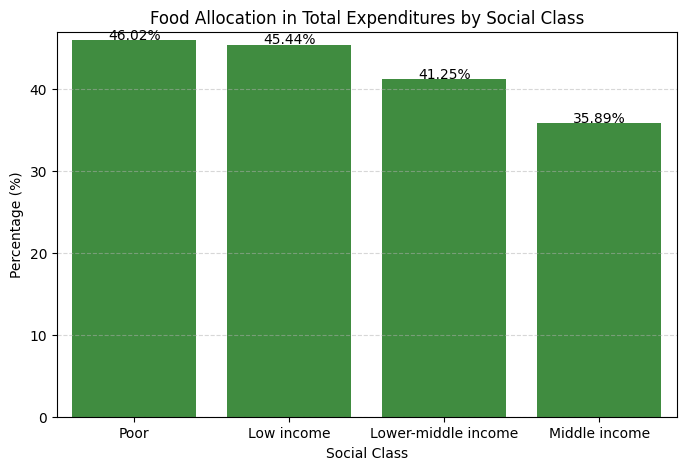

In [4]:
# Group by social class and mean percentage of housing expenses
housing_percentages = final_fies.groupby('SOCIAL_CLASS', observed=True).apply(
    lambda x: (x['FOOD']  / x['TOTEX']).mean() * 100,
    include_groups=False
)

plt.figure(figsize=(8, 5))
sns.barplot(x=housing_percentages.index, y=housing_percentages.values, color='green', alpha=0.8)

# percentage labels
for i, v in enumerate(housing_percentages.values):
    plt.text(i, v + 0.1, f'{v:.2f}%', ha='center')

plt.title('Food Allocation in Total Expenditures by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, max(housing_percentages.values) + 1) 
plt.show()

The visualization shows the food allocation in total expenditure by social class. It shows that the higher income groups allocates lesser percentage of food allocation since they may have more financial flexibility.

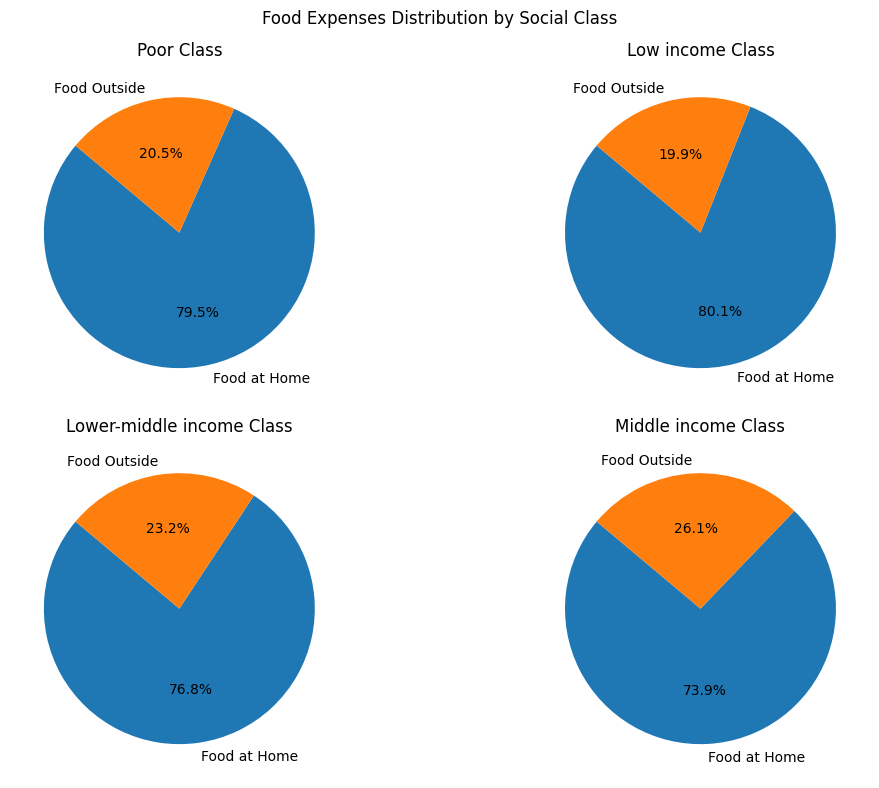

In [5]:
# Group data by social class and sum the food expenses
food_data = final_fies.groupby('SOCIAL_CLASS', observed=False)[['FOOD_HOME', 'FOOD_OUTSIDE']].sum()

plt.figure(figsize=(12, 8))

for i, social_class in enumerate(food_data.index):
    plt.subplot(2, 2, i + 1) 
    plt.pie(
        food_data.loc[social_class], 
        labels=['Food at Home', 'Food Outside'], 
        autopct='%.1f%%', 
        colors=['#1f77b4', '#ff7f0e'], 
        startangle=140
    )
    plt.title(f'{social_class} Class')

plt.suptitle('Food Expenses Distribution by Social Class')
plt.tight_layout()
plt.show()

Food Expenses Distribution by Social Class

This visualization shows the proportion of food expenses by social class. Both middle income and low-middle income social group have higher percentage for food outside which can mean these groups may prefer buying processed food or buy ready to eat meals outside.

##### Average Food Home Component Expenses by Social Class

<Figure size 1200x600 with 0 Axes>

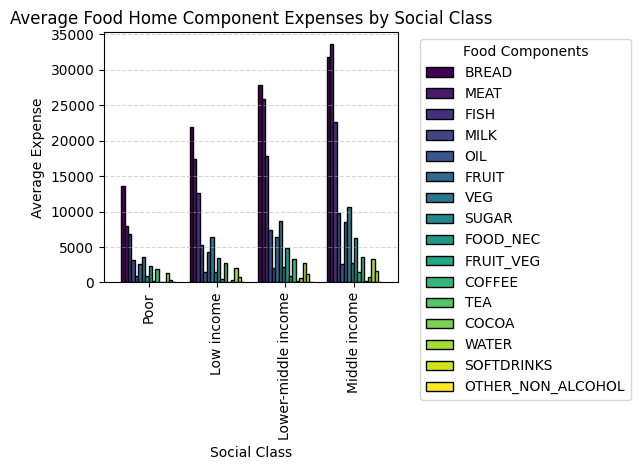

In [6]:
components = [
    'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT', 'VEG', 'SUGAR', 'FOOD_NEC',
    'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA', 'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL'
]

# Group data by SOCIAL_CLASS and sum the component values
component_data = final_fies.groupby('SOCIAL_CLASS', observed=False)[components].mean()

# Plotting
plt.figure(figsize=(12, 6))
component_data.plot(kind='bar', width=0.8, colormap='viridis', edgecolor='black')

plt.title('Average Food Home Component Expenses by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Average Expense')
plt.legend(title='Food Components', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Average Food Component Expenses by Social Class

This visualization shows the averages for all food home components expenses by social class. This shows how important food products such as bread, meat and fish for all social classes. It is also noticeable drinks like tea and cocoa only have enjoyers for low, low middle, and middle income social groups.

### **Housing expenditure analysis and visualization**

##### Housing Expenses as Part of Non-Food Expenses by Social Class

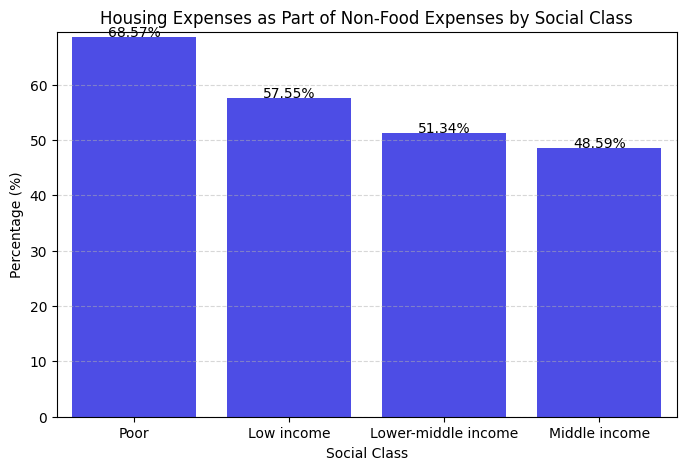

In [7]:
# Group by social class and mean percentage of housing expenses
housing_percentages = final_fies.groupby('SOCIAL_CLASS', observed=True).apply(
    lambda x: ((x['HOUSING_WATER'] + x['FURNISHING'] ) / x['NFOOD']).mean() * 100,
    include_groups=False
)

plt.figure(figsize=(8, 5))
sns.barplot(x=housing_percentages.index, y=housing_percentages.values, color='blue', alpha=0.8)

# percentage labels
for i, v in enumerate(housing_percentages.values):
    plt.text(i, v + 0.1, f'{v:.2f}%', ha='center')

plt.title('Housing Expenses as Part of Non-Food Expenses by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, max(housing_percentages.values) + 1) 
plt.show()

This visualization shows that poor households spend the highest share on housing (68.57%) due to limited income, while higher-income groups allocate less as they can afford other expenses. As income rises, spending shifts toward education, transportation, and discretionary items, reducing housing's proportion of total expenses.

##### Average Housing Expenses by Social Class

C:\Users\edjin\AppData\Local\Temp\ipykernel_35292\75711935.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_fies.groupby('SOCIAL_CLASS')[['HOUSING_WATER', 'FURNISHING']].mean().plot(kind='bar', figsize=(10, 5))


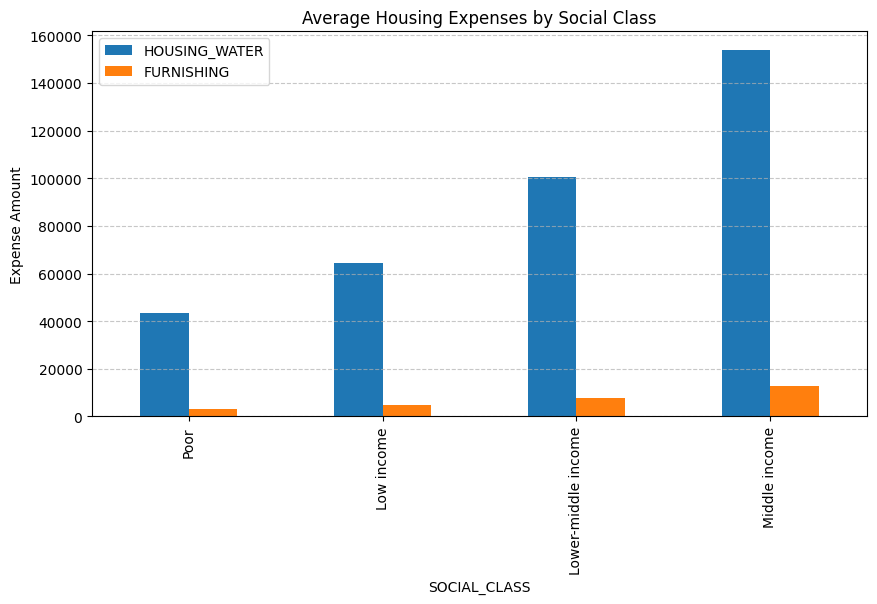

In [8]:
final_fies.groupby('SOCIAL_CLASS')[['HOUSING_WATER', 'FURNISHING']].mean().plot(kind='bar', figsize=(10, 5))
plt.title("Average Housing Expenses by Social Class")
plt.ylabel("Expense Amount")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This visualization shows that housing and water expenses increase with income, as higher-income groups tend to afford better housing and utilities. Furnishing expenses also rise, but at a slower rate, reflecting increased discretionary spending among wealthier households.

##### Correlation Between Housing Expense Categories

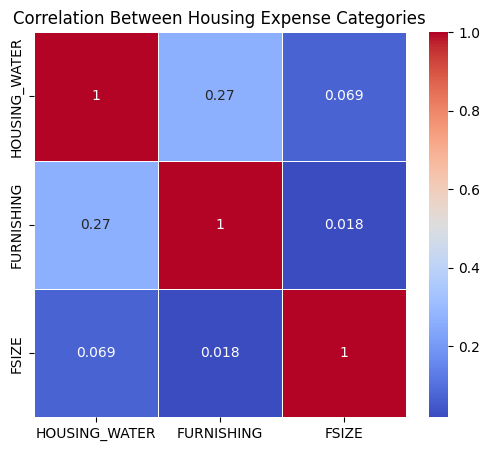

In [9]:
plt.figure(figsize=(6, 5))
sns.heatmap(final_fies[['HOUSING_WATER', 'FURNISHING', 'FSIZE']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Housing Expense Categories")
plt.show()

This heatmap shows the correlation between housing expenses and family size (FSIZE). Housing and water expenses have a weak positive correlation (0.27) with furnishing expenses, while both categories have very weak correlations with family size (0.069 and 0.018, respectively). This suggests that family size has little influence on housing and furnishing costs.

### **Education expenditure analysis and visualization**

##### Education Expenses as Part of Non-Food Expenses by Social Class

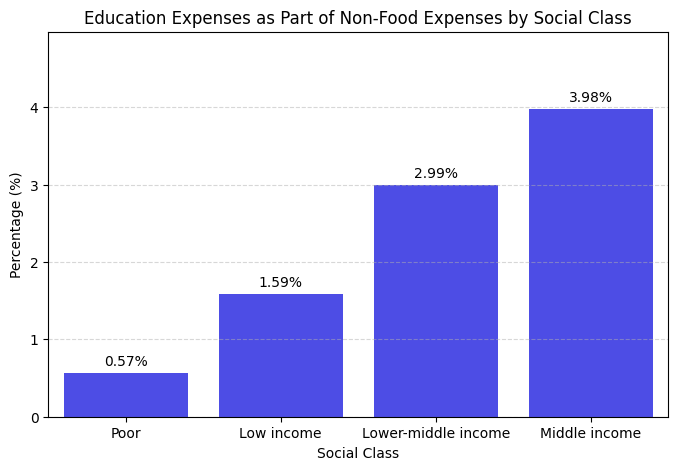

In [10]:
# Group by social class and calculate mean percentage directly
percentages = final_fies.groupby('SOCIAL_CLASS', observed=True).apply(
    lambda x: ((x['EDUCATION']) / x['NFOOD']).mean() * 100, include_groups=False
)

# Bar plot for better visualization of small percentages
plt.figure(figsize=(8, 5))
sns.barplot(x=percentages.index, y=percentages.values, color='blue', alpha=0.8)

# Add percentage labels for clarity
for i, v in enumerate(percentages.values):
    plt.text(i, v + 0.1, f'{v:.2f}%', ha='center')

plt.title('Education Expenses as Part of Non-Food Expenses by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, max(percentages.values) + 1) 
plt.show()

Education Expenses as Part of Non-Food Expenses by Social Class

This visualization shows the proportion of education expenses in non food expenditures by social class. The 'Poor' social group have a very low proportion for education which can mean this group have a more priority expenses rather than education.

##### Distribution of Education Expenses by Social Class

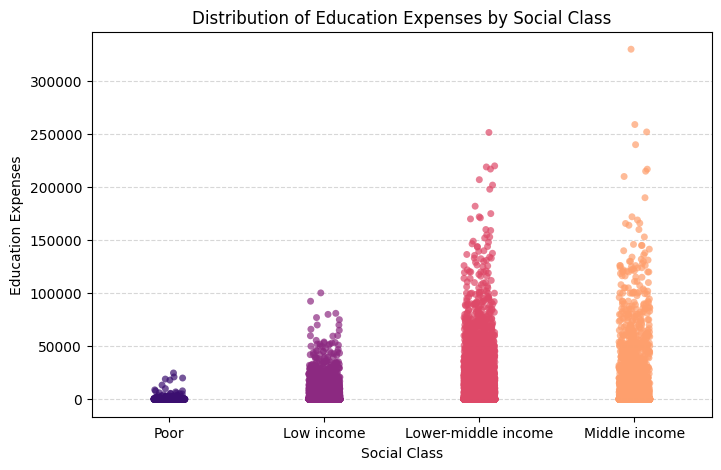

In [11]:
plt.figure(figsize=(8, 5))
sns.stripplot(
    x='SOCIAL_CLASS', 
    y='EDUCATION', 
    data=final_fies, 
    palette='magma', 
    hue='SOCIAL_CLASS',
    jitter=True,       
    alpha=0.7,          
    size=5              
)

plt.title('Distribution of Education Expenses by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Education Expenses')
plt.grid(axis='y', linestyle='--', alpha=0.5)  
plt.show()

Distribution of Education Expenses by Social Class

This visualization shows the distribution of education expenses by social class. It is noticeable here that both lower-middle income and middle income social group have more money to spare for education. This groups also likely can afford more expensive education institutes like private schools.

##### Number of Zero Expenses in EDUCATION by Social Class

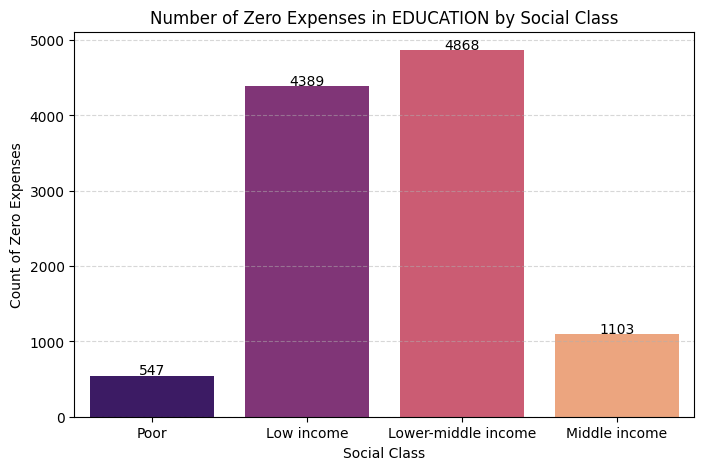

In [12]:
# Count zero expenses in EDUCATION by SOCIAL_CLASS
zero_education_counts = (final_fies.groupby('SOCIAL_CLASS', observed=False)['EDUCATION']
                         .apply(lambda x: (x == 0).sum())
                         .reset_index(name='Zero_Education_Count'))

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='SOCIAL_CLASS', y='Zero_Education_Count', data=zero_education_counts, 
            hue='SOCIAL_CLASS', palette='magma', legend=False)

# Add labels for clarity
for i, v in enumerate(zero_education_counts['Zero_Education_Count']):
    plt.text(i, v + 10, str(v), ha='center')

plt.title('Number of Zero Expenses in EDUCATION by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Count of Zero Expenses')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


Number of Zero Expenses in EDUCATION by Social Class

This visualization shows the number of zero expenses in education expenses by social class. it shows a high count to both low income and lower-middle income followedby poor and middle income. This can mean that this count may have availed scholarships or decided not to spend anymore for education.

### **Transportation expenditure analysis and visualization**

##### Average Transport Expenses by Social Class

C:\Users\edjin\AppData\Local\Temp\ipykernel_35292\1312792113.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_transportation_expense = final_fies.groupby('SOCIAL_CLASS')['TRANSPORT'].mean().reset_index()


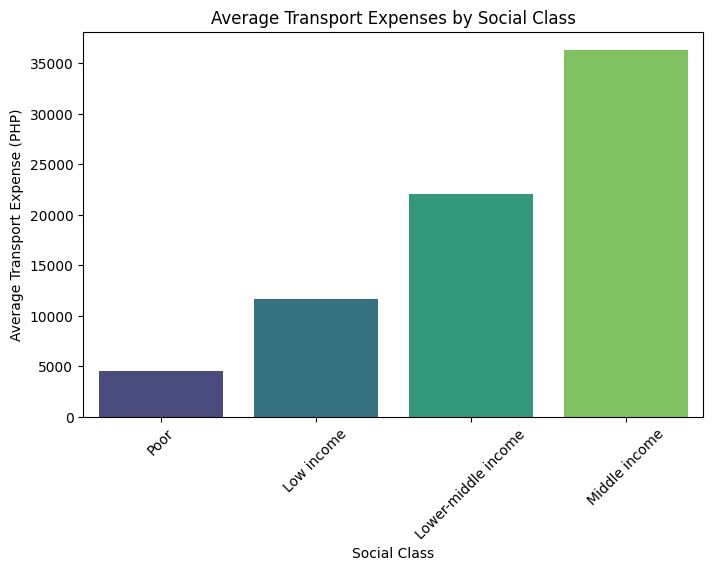

In [13]:
avg_transportation_expense = final_fies.groupby('SOCIAL_CLASS')['TRANSPORT'].mean().reset_index()
order = ['Poor', 'Low income', 'Lower-middle income', 'Middle income']

plt.figure(figsize=(8,5))
sns.barplot(
    x='SOCIAL_CLASS',
    y='TRANSPORT',
    data=avg_transportation_expense,
    palette='viridis',
    hue='SOCIAL_CLASS',
    order=order
)

plt.title('Average Transport Expenses by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Average Transport Expense (PHP)')
plt.xticks(rotation=45)
plt.show()

- As social class increases (in terms of income), transport expenses also increase.

- Lower-income groups most likely rely on cheaper public transportation, while higher-income individuals have more flexibility with private vehicles or premium transport options.

##### Average Transport Expenses by City in NCR

In [14]:
ncr_city_mapping = {
    3900: "City of Manila",
    7401: "City of Mandaluyong",
    7402: "City of Marikina",
    7403: "City of Pasig",
    7404: "Quezon City",
    7405: "City of San Juan",
    7501: "Caloocan City",
    7502: "City of Malabon",
    7503: "City of Navotas",
    7504: "City of Valenzuela",
    7601: "City of Las Piñas",
    7602: "City of Makati",
    7603: "City of Muntinlupa",
    7604: "City of Parañaque",
    7605: "Pasay City",
    7600: "Pateros",
    7607: "Taguig City"
}

final_fies_ncr = final_fies[final_fies['RPROV'].isin(ncr_city_mapping.keys())].copy()
final_fies_ncr['City'] = final_fies_ncr['RPROV'].map(ncr_city_mapping)

C:\Users\edjin\AppData\Local\Temp\ipykernel_35292\1508191353.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='TRANSPORT', y='City', data=avg_transport_ncr, palette='coolwarm')


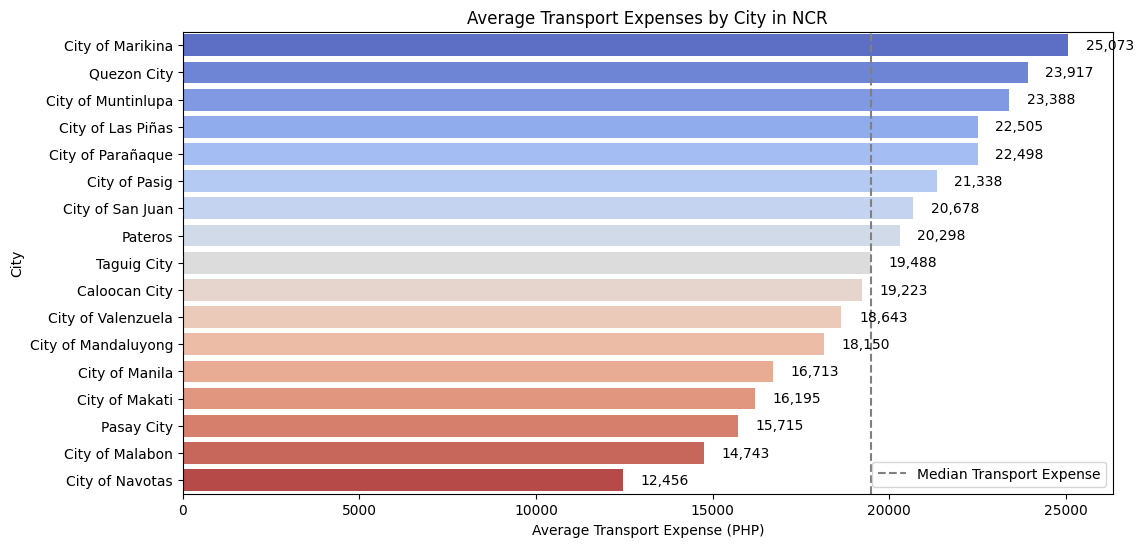

In [15]:
avg_transport_ncr = final_fies_ncr.groupby('City')['TRANSPORT'].mean().reset_index()
avg_transport_ncr = avg_transport_ncr.sort_values(by='TRANSPORT', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='TRANSPORT', y='City', data=avg_transport_ncr, palette='coolwarm')

# Add value labels
for i, v in enumerate(avg_transport_ncr['TRANSPORT']):
    ax.text(v + 500, i, f"{int(v):,}", va='center', fontsize=10)

# Add a median reference line
plt.axvline(x=avg_transport_ncr['TRANSPORT'].median(), color='gray', linestyle='--', label="Median Transport Expense")

plt.title("Average Transport Expenses by City in NCR")
plt.xlabel("Average Transport Expense (PHP)")
plt.ylabel("City")
plt.legend()
plt.show()

- Cities with higher transport expenses (Marikina, Quezon City, and Las Pinas) have the highest transport spending, possibly due to longer commutes or higher private vehicle usage

- Cities like Navotas, Malabon, and Pasay have lower transport costs, maybe due to good public transport, shorter travel distances, or the distribution of lower income classes are dominant here.

##### Total Transport Expenses by Social Class in NCR Cities (Sorted)

C:\Users\edjin\AppData\Local\Temp\ipykernel_35292\3436696079.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_transport_social_ncr = final_fies_ncr.groupby(['City', 'SOCIAL_CLASS']) \


<Figure size 1400x700 with 0 Axes>

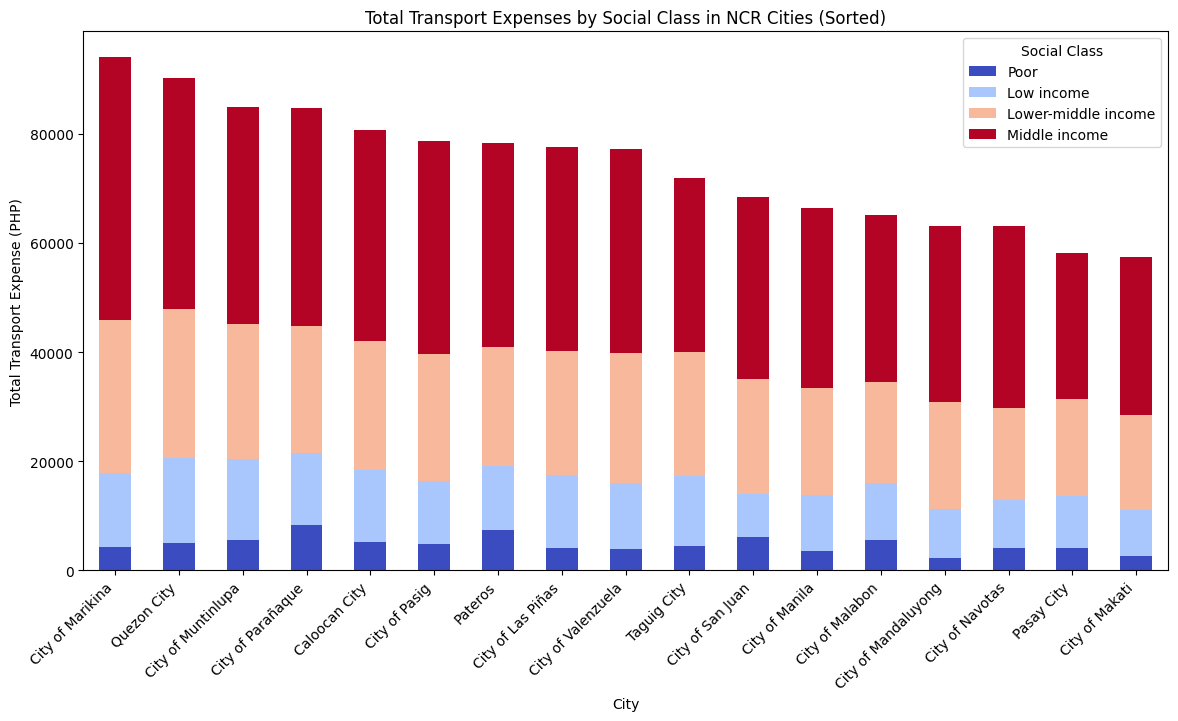

In [16]:
total_transport_social_ncr = final_fies_ncr.groupby(['City', 'SOCIAL_CLASS']) \
    ['TRANSPORT'].mean().reset_index()

df_pivot = total_transport_social_ncr.pivot(
    index="City", 
    columns="SOCIAL_CLASS", 
    values="TRANSPORT"
)

df_pivot['Total'] = df_pivot.sum(axis=1)  
df_pivot = df_pivot.sort_values(by='Total', ascending=False).drop(columns=['Total']) 

plt.figure(figsize=(14, 7))
df_pivot.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(14, 7))

plt.title("Total Transport Expenses by Social Class in NCR Cities (Sorted)")
plt.xlabel("City")
plt.ylabel("Total Transport Expense (PHP)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Social Class", loc='upper right')

plt.show()

- In all cities, the middle-income group dominates the total transport expenses

- Lower-income and poor groups have minimal transport spending across all cities

##### Transport Expenditure vs. Total Expenditure by Social Class in NCR

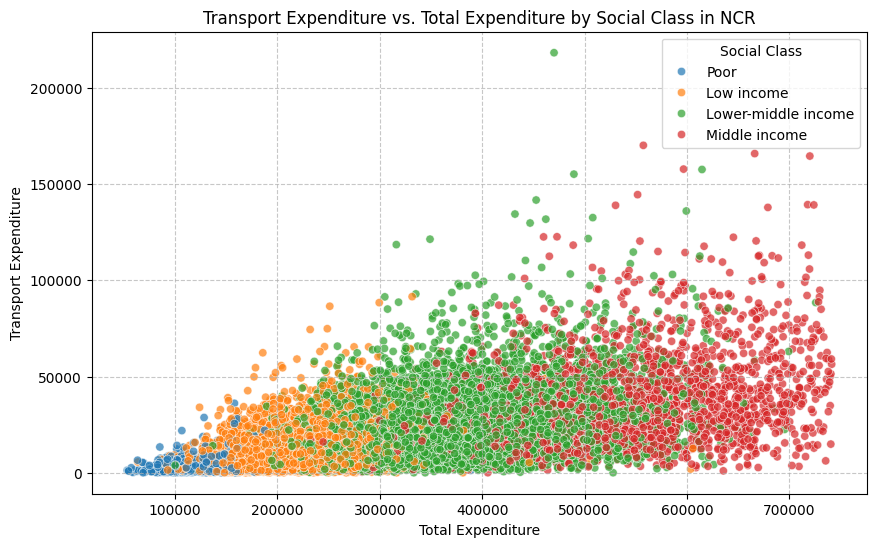

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_fies, x="TOTEX", y="TRANSPORT", hue="SOCIAL_CLASS", alpha=0.7)
plt.xlabel("Total Expenditure")
plt.ylabel("Transport Expenditure")
plt.title("Transport Expenditure vs. Total Expenditure by Social Class in NCR")
plt.legend(title="Social Class", bbox_to_anchor=(1, 1))
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

- Higher-income groups allocate higher amounts to transportation as total expenditure increases.

- Poor and low-income households allocate less to transport spending, likely due to public transport reliance and/or budget constraints.

- There are some outliers in transport spending, most likely due to private vehicle ownership and its associated expenses.

##### Proportion of Transport Expenditure by Social Class

C:\Users\edjin\AppData\Local\Temp\ipykernel_35292\2665480441.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = final_fies.groupby('SOCIAL_CLASS').agg({


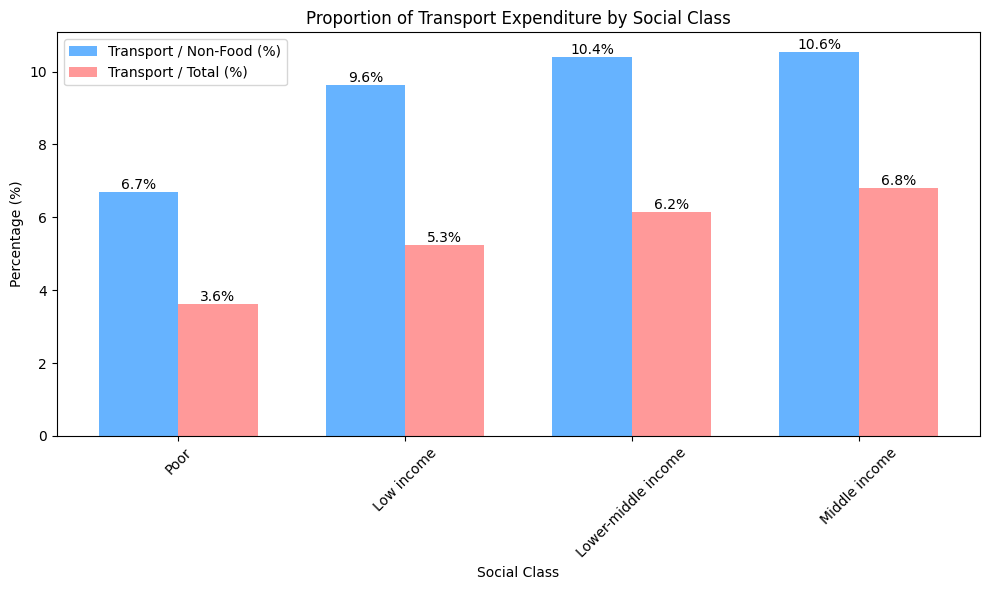

In [18]:
agg = final_fies.groupby('SOCIAL_CLASS').agg({
    'TRANSPORT': 'sum', 
    'NFOOD': 'sum', 
    'TOTEX': 'sum'
}).reindex(order)

agg['prop_nfood'] = (agg['TRANSPORT'] / agg['NFOOD']) * 100
agg['prop_totex'] = (agg['TRANSPORT'] / agg['TOTEX']) * 100

x = np.arange(len(agg))       
width = 0.35                 

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, agg['prop_nfood'], width, label='Transport / Non-Food (%)', color='#66b3ff')
bar2 = ax.bar(x + width/2, agg['prop_totex'], width, label='Transport / Total (%)', color='#ff9999')

ax.set_xlabel('Social Class')
ax.set_ylabel('Percentage (%)')
ax.set_title('Proportion of Transport Expenditure by Social Class')
ax.set_xticks(x)
ax.set_xticklabels(agg.index, rotation=45)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            f'{height:.1f}%',
            xy=(rect.get_x() + rect.get_width() / 2, height),
            ha='center', va='bottom', fontsize=10
        )

autolabel(bar1)
autolabel(bar2)

plt.tight_layout()
plt.show()

- Transport expenses only make up a small fraction of total expenditures 

- Transport has a slightly higher share in non-food expenses within non-food expenditures 

### **Communication expenditure analysis and visualization**

##### Average Communication Expenses by Social Class

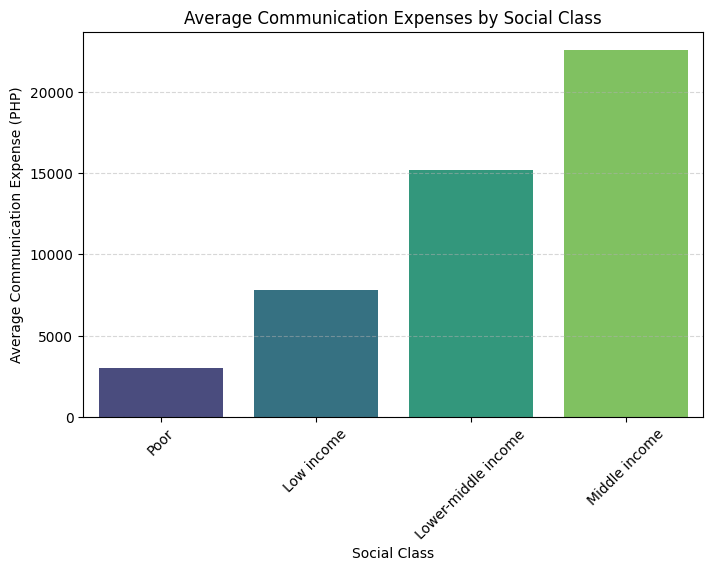

In [19]:
# Group by social class with observed=False and order correctly
avg_comm_expense = (
    final_fies.groupby('SOCIAL_CLASS', observed=False)['COMMUNICATION']
    .mean()
    .reset_index()
)

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='SOCIAL_CLASS', y='COMMUNICATION', data=avg_comm_expense, palette='viridis', hue='SOCIAL_CLASS')

plt.title('Average Communication Expenses by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Average Communication Expense (PHP)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


Average Communication Expenses by Social Class

This visualization shows the average expenditure for the communications category by the different social classes. The graph shows that the 'Middle income' social class have the highest average communication expense which can mean people in this group tend to utilize communication services for work or social engagement.

##### Percentage of Total Income Spent on Communication

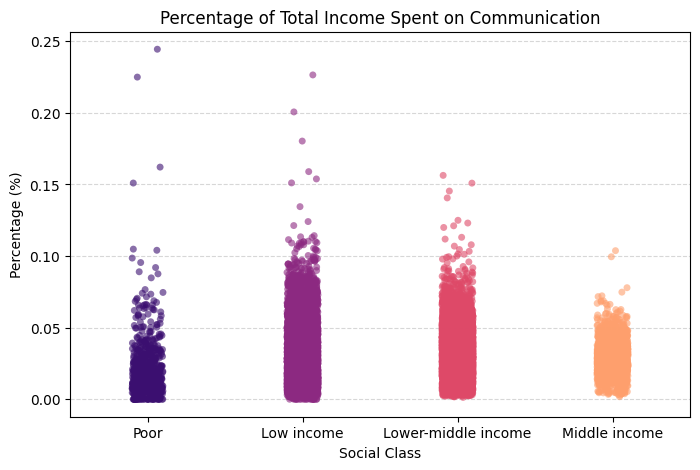

In [20]:
plt.figure(figsize=(8, 5))
sns.stripplot(
    x='SOCIAL_CLASS', 
    y=final_fies['COMMUNICATION'] / final_fies['TOINC'], 
    data=final_fies, 
    jitter=True,           
    alpha=0.6,             
    size=5,                
    palette='magma',      
    hue='SOCIAL_CLASS'    
)

plt.title('Percentage of Total Income Spent on Communication')
plt.xlabel('Social Class')
plt.ylabel('Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)  
plt.show()

Percentage of Total Income Spent on Communication

This visualization shows the percentage of total income spent on communication services per social group. The Middle income social group have the least or none 0.0% for percentage for communication expense which can mean people of this group have a sure financial capability or may be required to have communication services.

##### Proportion of Communication in Non-Food Expenses

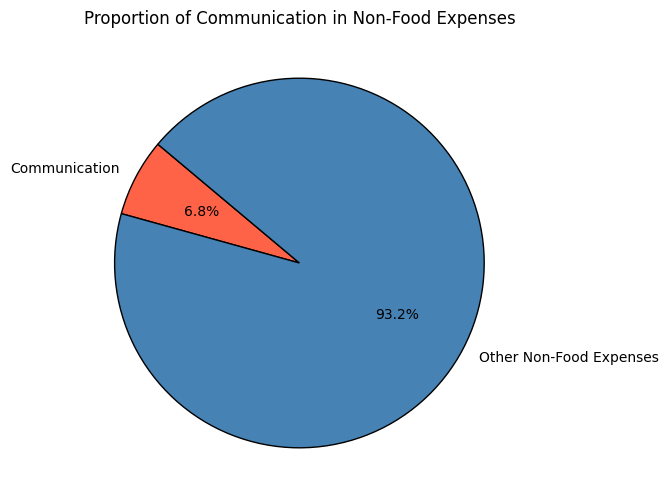

In [21]:
nfood_total = final_fies['NFOOD'].sum()
communication_total = final_fies['COMMUNICATION'].sum()
remaining_nfood = nfood_total - communication_total

labels = ['Communication', 'Other Non-Food Expenses']
sizes = [communication_total, remaining_nfood]
colors = ['#FF6347', '#4682B4']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=140, wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title('Proportion of Communication in Non-Food Expenses')
plt.show()

Proportion of Communication in Non-Food Expenses

This visualization shows the percentage of communication expense for all non-food expenses. It shows a 6.8% which can mean that communication is considered an important expense for daily life in NCR

##### Communication Expenses as Part of Non-Food Expenses by Social Class

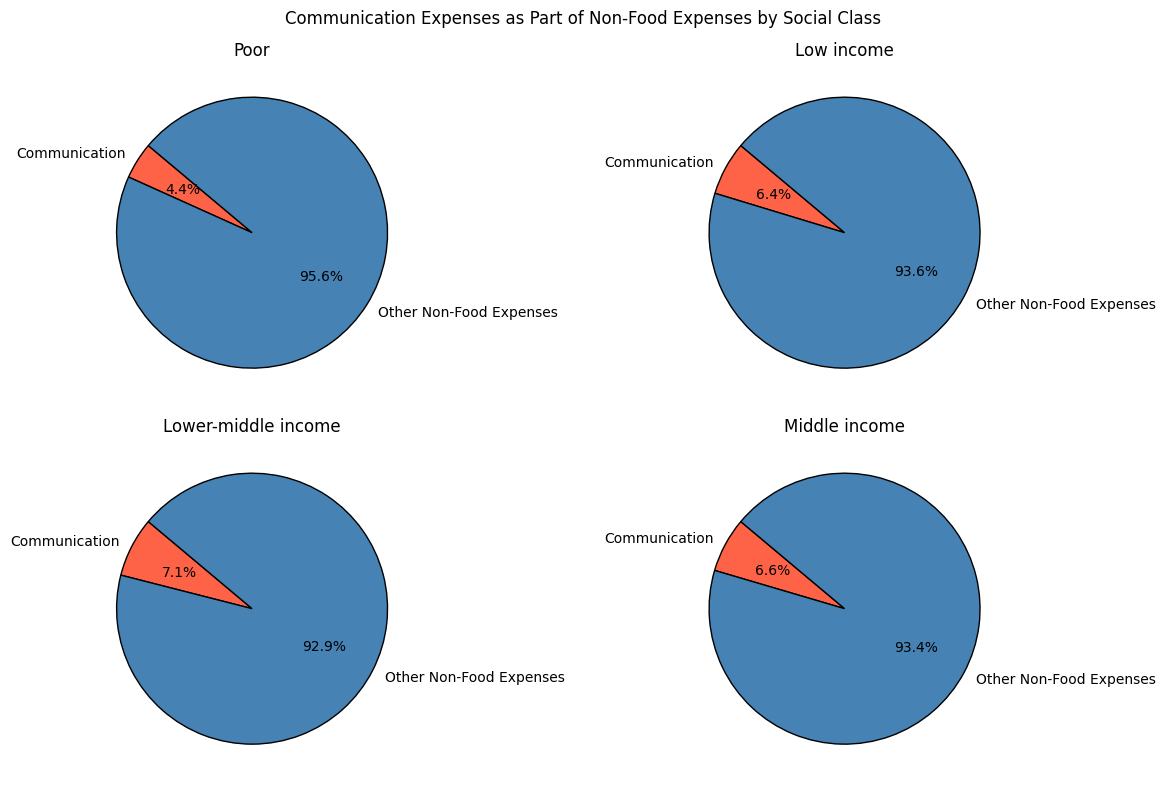

In [22]:
# Group data by social class
grouped_data = final_fies.groupby('SOCIAL_CLASS', observed=False).agg({
    'COMMUNICATION': 'sum',
    'NFOOD': 'sum'
})

# Create subplot
num_classes = len(grouped_data)
rows = (num_classes // 2) + (num_classes % 2 > 0) 

fig, axes = plt.subplots(rows, 2, figsize=(12, rows * 4))
axes = axes.flatten()

# Pie charts for each social class
for idx, (class_name, row) in enumerate(grouped_data.iterrows()):
    communication_total = row['COMMUNICATION']
    remaining_nfood = row['NFOOD'] - communication_total

    sizes = [communication_total, remaining_nfood]
    labels = ['Communication', 'Other Non-Food Expenses']

    axes[idx].pie(sizes, labels=labels, autopct='%.1f%%', 
                  colors=['#FF6347', '#4682B4'],
                  startangle=140, wedgeprops={'linewidth': 1, 'edgecolor': 'black'})

    axes[idx].set_title(f'{class_name}')


for idx in range(len(grouped_data), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Communication Expenses as Part of Non-Food Expenses by Social Class')
plt.tight_layout()
plt.show()

Communication Expenses as Part of Non-Food Expenses by Social Class

This visualization shows the proportion of Communication in Non-Food Expenses by Social Classes. It shows low and lower middle income social groups have the highest percentage spent for communications expenditure which can mean that the minimum price for communications is expensive for this groups or a result of budget allocations.

### **Health expenditure analysis and visualization**

##### Average Health Expenses by Social Class

C:\Users\edjin\AppData\Local\Temp\ipykernel_35292\4029228095.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_health_expense = final_fies.groupby('SOCIAL_CLASS')['HEALTH'].mean().reset_index()


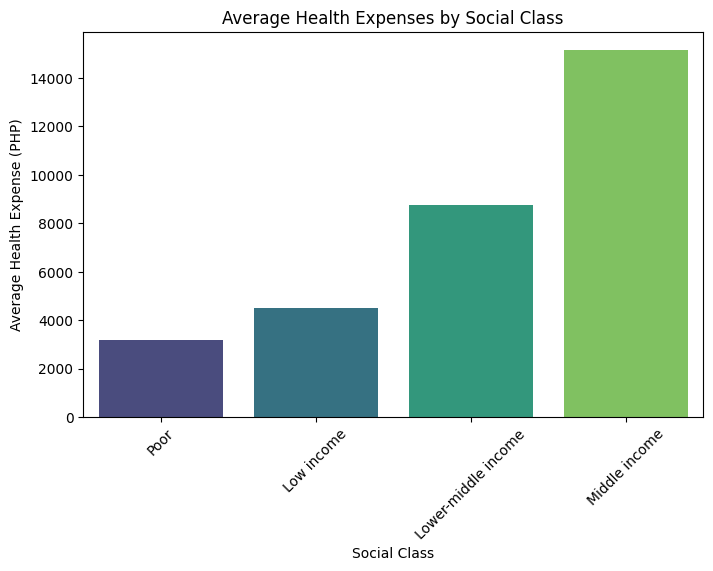

In [23]:
avg_health_expense = final_fies.groupby('SOCIAL_CLASS')['HEALTH'].mean().reset_index()
order = ['Poor', 'Low income', 'Lower-middle income', 'Middle income']

plt.figure(figsize=(8,5))
sns.barplot(
    x='SOCIAL_CLASS',
    y='HEALTH',
    data=avg_health_expense,
    palette='viridis',
    hue='SOCIAL_CLASS',
    order=order
)

plt.title('Average Health Expenses by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Average Health Expense (PHP)')
plt.xticks(rotation=45)
plt.show()

- Wealthier groups have greater access to healthcare. As seen in the visualizations, middle-income individuals likely prioritize healthcare and may afford private health services, insurance, and/or treatments. Unfortunately, lower-income groups may have limited access to private healthcare services due to financial constraints, that is why they allocate the least amount of money for health expenses.

- The difference in health spending across social classes shows inequality in healthcare access.

##### Health Expenditure vs. Total Expenditure by Social Class in NCR

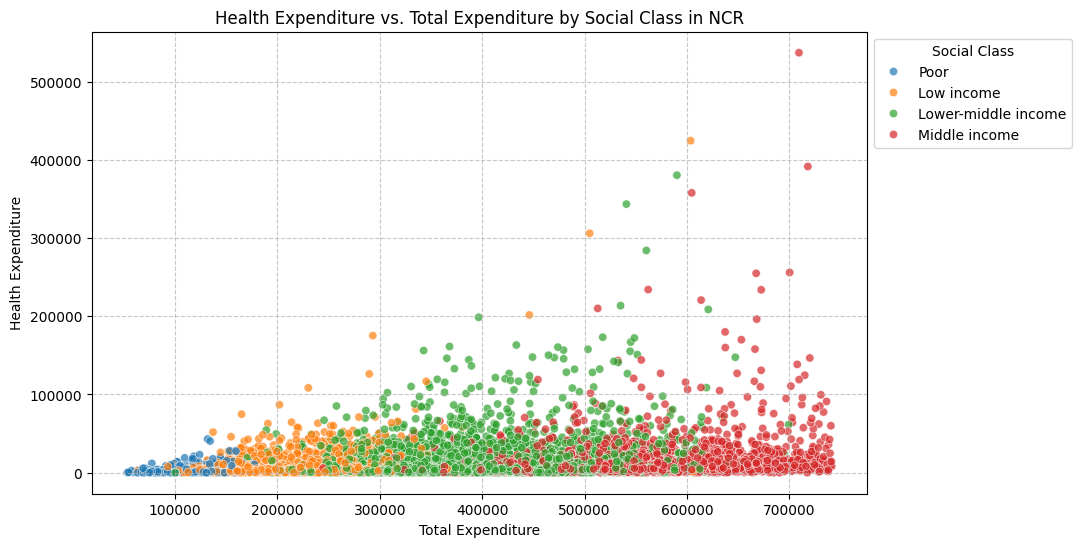

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_fies, x="TOTEX", y="HEALTH", hue="SOCIAL_CLASS", alpha=0.7)
plt.xlabel("Total Expenditure")
plt.ylabel("Health Expenditure")
plt.title("Health Expenditure vs. Total Expenditure by Social Class in NCR")
plt.legend(title="Social Class", bbox_to_anchor=(1, 1))
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

- As total expenditure increases, health expenditure also rises. However, the rate of increase is not uniform across all social classes.

- The health expenditure for the "Poor" and "Low-income" groups is relatively low. This might be because they prioritize other necessities over healthcare.

- A few red data points (middle-income households) indicate an extremely high allocation of income to health expenditures, possibly due to major medical procedures or chronic illnesses.

##### Proportion of Health Expenditure by Social Class

C:\Users\edjin\AppData\Local\Temp\ipykernel_35292\3591456173.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = final_fies.groupby('SOCIAL_CLASS').agg({


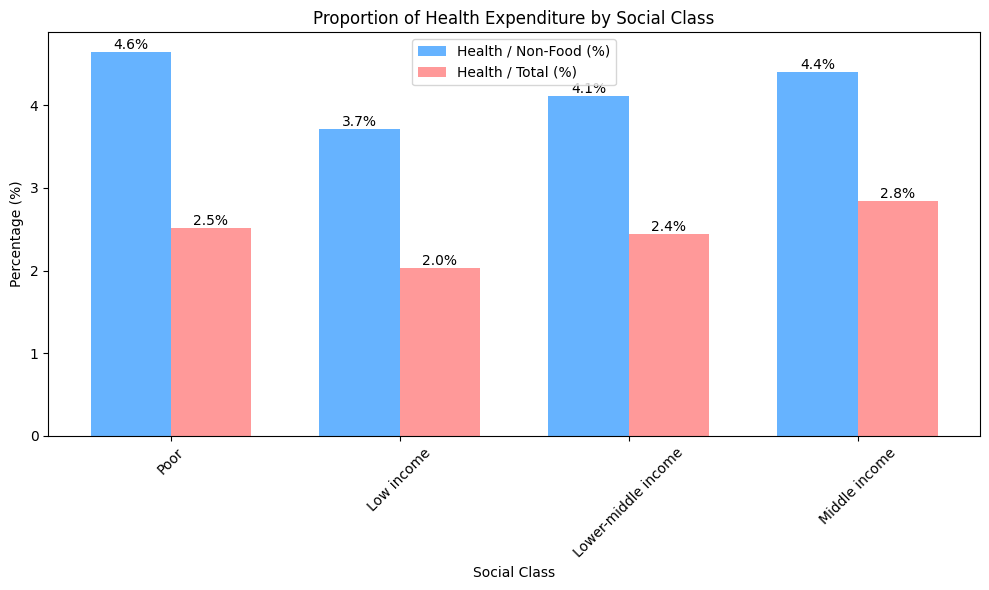

In [25]:
agg = final_fies.groupby('SOCIAL_CLASS').agg({
    'HEALTH': 'sum', 
    'NFOOD': 'sum', 
    'TOTEX': 'sum'
}).reindex(order)

agg['prop_nfood'] = (agg['HEALTH'] / agg['NFOOD']) * 100
agg['prop_totex'] = (agg['HEALTH'] / agg['TOTEX']) * 100

x = np.arange(len(agg))       
width = 0.35                 

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, agg['prop_nfood'], width, label='Health / Non-Food (%)', color='#66b3ff')
bar2 = ax.bar(x + width/2, agg['prop_totex'], width, label='Health / Total (%)', color='#ff9999')

ax.set_xlabel('Social Class')
ax.set_ylabel('Percentage (%)')
ax.set_title('Proportion of Health Expenditure by Social Class')
ax.set_xticks(x)
ax.set_xticklabels(agg.index, rotation=45)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            f'{height:.1f}%',
            xy=(rect.get_x() + rect.get_width() / 2, height),
            ha='center', va='bottom', fontsize=10
        )

autolabel(bar1)
autolabel(bar2)

plt.tight_layout()
plt.show()

- Middle-income households allocate the highest proportion of their budget to healthcare, while poor and low-income groups spend less

- Compared to other expenses, all the social classes allocate a smaller percentage to health, likely because of poor healthcare programs in the country or they do not care/know the importance of taking care of their health.

### **Clothing expenditure analysis and visualization**

##### Average Cloth Expenses by Social Class

C:\Users\edjin\AppData\Local\Temp\ipykernel_35292\1320691091.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_cloth_expense = final_fies.groupby('SOCIAL_CLASS')['CLOTH'].mean().reset_index()


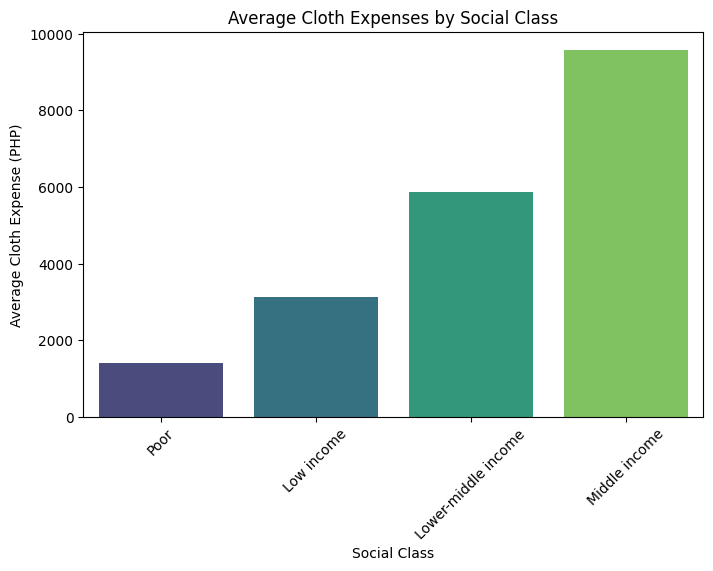

In [26]:
avg_cloth_expense = final_fies.groupby('SOCIAL_CLASS')['CLOTH'].mean().reset_index()
order = ['Poor', 'Low income', 'Lower-middle income', 'Middle income']

plt.figure(figsize=(8,5))
sns.barplot(
    x='SOCIAL_CLASS',
    y='CLOTH',
    data=avg_cloth_expense,
    palette='viridis',
    hue='SOCIAL_CLASS',
    order=order
)

plt.title('Average Cloth Expenses by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Average Cloth Expense (PHP)')
plt.xticks(rotation=45)
plt.show()

- Common observation in different components of expenditures is that as income increases, the spending in cloth also rises.

- The poor spends the least on clothing, likely prioritizing basic necessities over optional purchases.

- Clothing expenditure may not just be based on necessity, but also lifestyle preferences and societal expectations.

##### Cloth Expenditure vs. Total Expenditure by Social Class in NCR

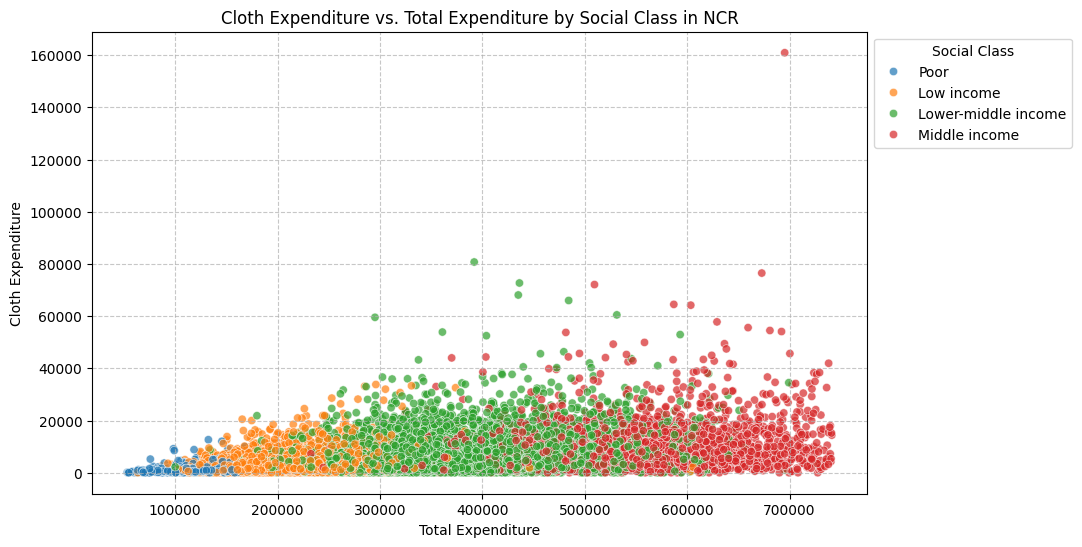

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_fies, x="TOTEX", y="CLOTH", hue="SOCIAL_CLASS", alpha=0.7)
plt.xlabel("Total Expenditure")
plt.ylabel("Cloth Expenditure")
plt.title("Cloth Expenditure vs. Total Expenditure by Social Class in NCR")
plt.legend(title="Social Class", bbox_to_anchor=(1, 1))
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

- Higher-income groups spend more on clothing, suggesting that they have more disposable income allocated for fashion, branded clothing, or luxury apparel.

- There is a red-dot outlier (middle income), which suggests that a certain individual allocated a huge amount to clothing. This may be an influencer who needs luxury clothing or simply someone who enjoys spending on luxury brands.

##### Proportion of Cloth Expenditure by Social Class

C:\Users\edjin\AppData\Local\Temp\ipykernel_35292\2472402802.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = final_fies.groupby('SOCIAL_CLASS').agg({


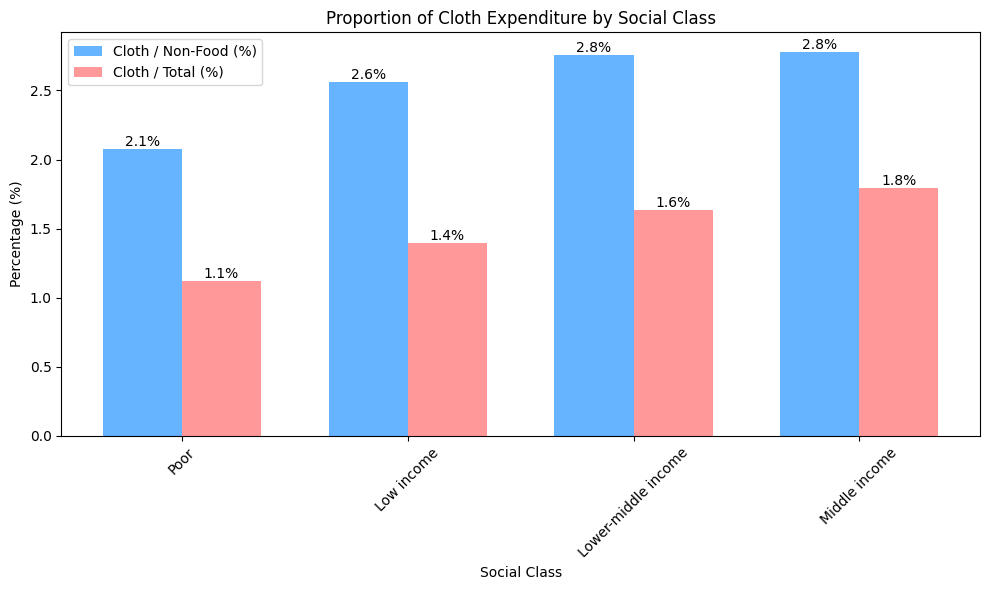

In [28]:
agg = final_fies.groupby('SOCIAL_CLASS').agg({
    'CLOTH': 'sum', 
    'NFOOD': 'sum', 
    'TOTEX': 'sum'
}).reindex(order)

agg['prop_nfood'] = (agg['CLOTH'] / agg['NFOOD']) * 100
agg['prop_totex'] = (agg['CLOTH'] / agg['TOTEX']) * 100

x = np.arange(len(agg))       
width = 0.35                 

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, agg['prop_nfood'], width, label='Cloth / Non-Food (%)', color='#66b3ff')
bar2 = ax.bar(x + width/2, agg['prop_totex'], width, label='Cloth / Total (%)', color='#ff9999')

ax.set_xlabel('Social Class')
ax.set_ylabel('Percentage (%)')
ax.set_title('Proportion of Cloth Expenditure by Social Class')
ax.set_xticks(x)
ax.set_xticklabels(agg.index, rotation=45)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            f'{height:.1f}%',
            xy=(rect.get_x() + rect.get_width() / 2, height),
            ha='center', va='bottom', fontsize=10
        )

autolabel(bar1)
autolabel(bar2)

plt.tight_layout()
plt.show()

- Surprisingly, poor households allocate 2.1% of their non-food budget to clothing, which is close to the 2.8% in middle-income households.

- The difference between social classes is not as huge, suggesting that while middle-income earners spend more in absolute terms, they do not allocate an extreme portion of their budget to clothing.

### **Recreation & Leisure expenditure analysis and visualization**

##### Recreation & Occasion Expenses as Part of Non-Food Expenses by Social Class

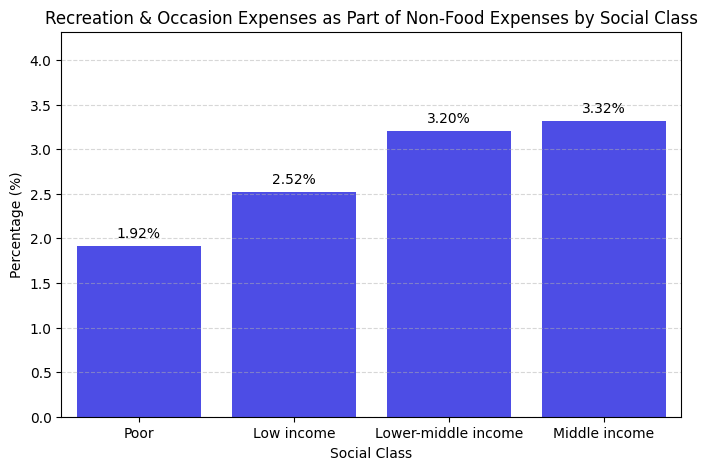

In [29]:
# Group by social class and mean percentage of recreation expenses
recreation_percentages = final_fies.groupby('SOCIAL_CLASS', observed=True).apply(
    lambda x: ((x['RECREATION'] + x['OCCASION']) / x['NFOOD']).mean() * 100,
    include_groups=False
)

plt.figure(figsize=(8, 5))
sns.barplot(x=recreation_percentages.index, y=recreation_percentages.values, color='blue', alpha=0.8)

# percentage labels
for i, v in enumerate(recreation_percentages.values):
    plt.text(i, v + 0.1, f'{v:.2f}%', ha='center')

plt.title('Recreation & Occasion Expenses as Part of Non-Food Expenses by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, max(recreation_percentages.values) + 1)  
plt.show()


-The bar chart illustrates the proportion of Recreation & Occasion expenses relative to total Non-Food (NFOOD) expenses across different social classes.

-Poor households allocate the smallest percentage (1.92%) of their non-food budget to recreation and special occasions.

-As income increases, the proportion spent on these activities rises, reaching 3.32% for the Middle-income group.

-This suggests that higher-income groups have more flexibility to spend on leisure and celebrations, whereas lower-income groups prioritize essential non-food needs.

##### Average Recreation & Occasion Expenses by Social Class

C:\Users\edjin\AppData\Local\Temp\ipykernel_35292\246133917.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_recreation_expense = final_fies.groupby('SOCIAL_CLASS')[['RECREATION', 'OCCASION']].mean().reset_index()


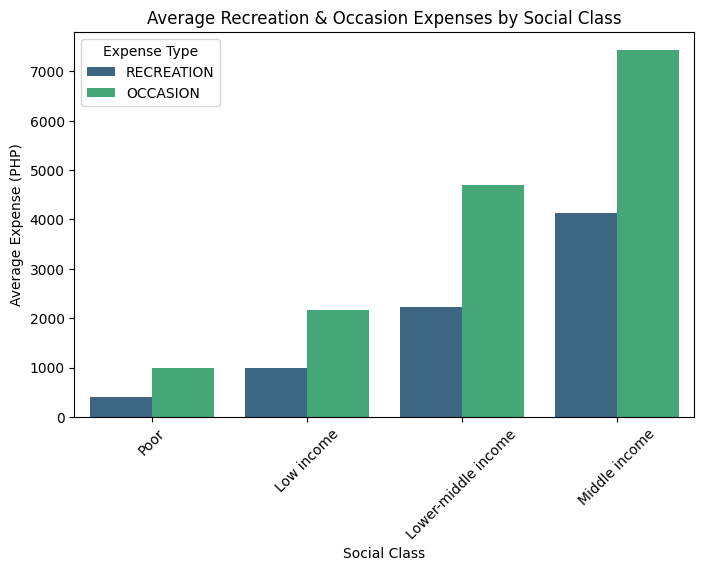

In [30]:
# Compute average recreation & occasion expenses by social class
avg_recreation_expense = final_fies.groupby('SOCIAL_CLASS')[['RECREATION', 'OCCASION']].mean().reset_index()
order = ['Poor', 'Low income', 'Lower-middle income', 'Middle income']

# Melt the dataframe for grouped bar plot
avg_recreation_expense = avg_recreation_expense.melt(id_vars='SOCIAL_CLASS', var_name='Expense Type', value_name='Average Expense')

plt.figure(figsize=(8,5))
sns.barplot(
    x='SOCIAL_CLASS',
    y='Average Expense',
    hue='Expense Type',
    data=avg_recreation_expense,
    palette='viridis',
    order=order
)

plt.title('Average Recreation & Occasion Expenses by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Average Expense (PHP)')
plt.xticks(rotation=45)
plt.legend(title='Expense Type')
plt.show()


-This grouped bar chart displays the average recreation and occasion expenses across different social classes.

-Both expense categories (Recreation & Occasion) increase as income level rises.

-The Middle-income group spends the most on both categories, with Occasion expenses surpassing Recreation.

-The Poor social class has the lowest spending, reflecting limited discretionary income for leisure and celebrations.

-The trend suggests that higher-income groups prioritize social and recreational activities more than lower-income groups.

##### Recreation vs. Occasion Expenses

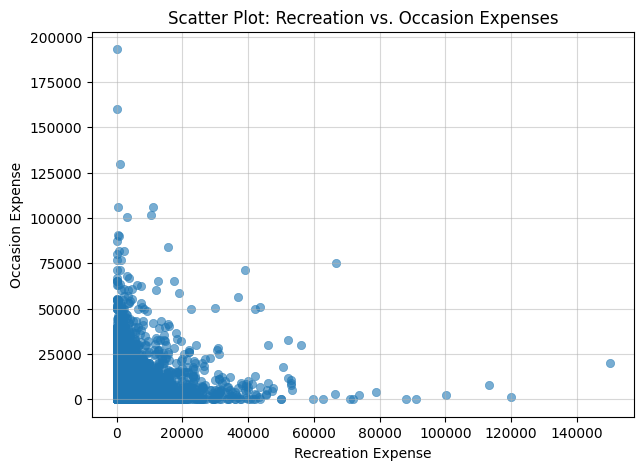

In [31]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=final_fies['RECREATION'],
    y=final_fies['OCCASION'],
    alpha=0.6,
    edgecolor=None
)

plt.title('Scatter Plot: Recreation vs. Occasion Expenses')
plt.xlabel('Recreation Expense')
plt.ylabel('Occasion Expense')
plt.grid(alpha=0.5)
plt.show()

-This scatter plot visualizes the relationship between Recreation and Occasion expenses.

-The majority of points cluster near the lower-left corner, meaning most households have low spending on both categories.

-A few outliers represent households with very high spending on either Recreation or Occasion.

-There appears to be a weak positive correlation, suggesting that those who spend more on Recreation also tend to spend more on Occasion expenses, but the relationship is not very strong.

##### Recreation & Occasion vs. Other Non-Food Expenses

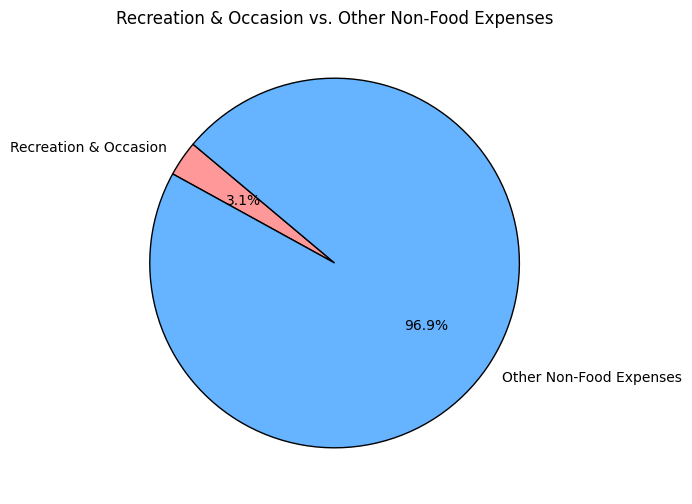

In [32]:
# Calculate total expenses for Recreation + Occasion and Other Non-Food
total_recreation_occasion = final_fies[['RECREATION', 'OCCASION']].sum().sum()
total_nfood = final_fies['NFOOD'].sum()

# Calculate Other Non-Food Expenses
other_nfood_expense = total_nfood - total_recreation_occasion

labels = ['Recreation & Occasion', 'Other Non-Food Expenses']
sizes = [total_recreation_occasion, other_nfood_expense]
colors = ['#ff9999', '#66b3ff']


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Recreation & Occasion vs. Other Non-Food Expenses')
plt.show()

-The pie chart compares the share of Recreation & Occasion expenses against total non-food expenses.

-Recreation & Occasion expenses make up only 3.1%, while Other Non-Food Expenses account for 96.9%.

-This suggests that households allocate a very small portion of their budget to recreation and special occasions compared to other non-food necessities.

### **Alcohol & Tobacco expenditure analysis and visualization**

##### Comparison of Tobacco & Alcohol Expenses by Social Class

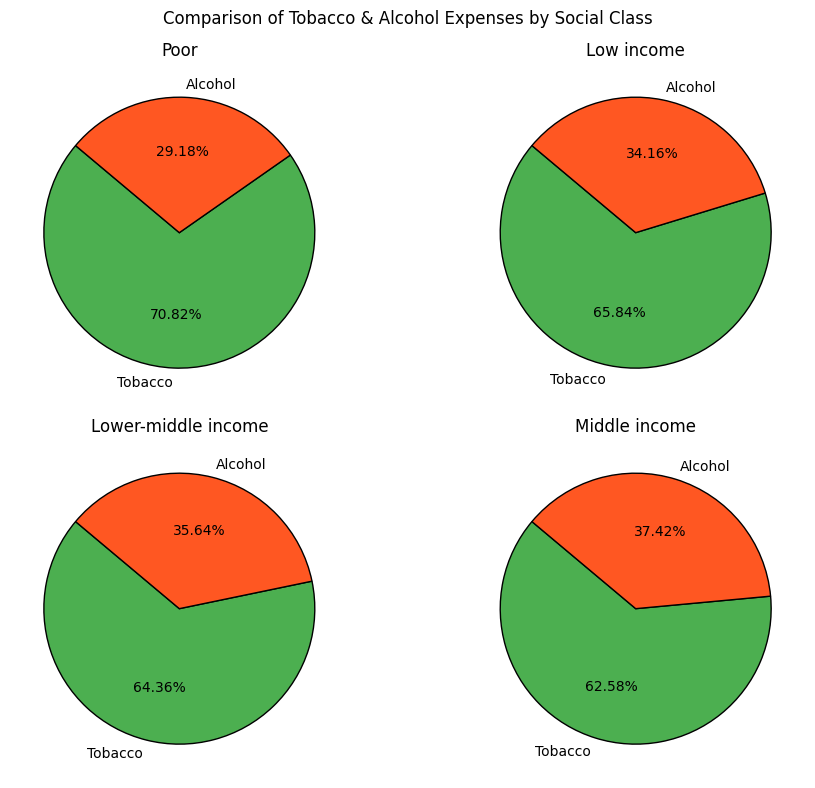

In [33]:
# Group data by social class and percentages for Tobacco and Alcohol
percentage_data = final_fies.groupby('SOCIAL_CLASS', observed=False).apply(
    lambda x: [
        ((x['TOBACCO']) / x['NFOOD']).mean() * 100,
        ((x['ALCOHOL']) / x['NFOOD']).mean() * 100
    ],
    include_groups=False
)


social_classes = percentage_data.index
values = percentage_data.values


plt.figure(figsize=(10, 8))

for i, (label, value) in enumerate(zip(social_classes, values), 1):
    plt.subplot(2, 2, i) 
    plt.pie(
        value, 
        labels=['Tobacco', 'Alcohol'], 
        autopct='%.2f%%', 
        colors=['#4CAF50', '#FF5722'], 
        startangle=140, 
        wedgeprops={'edgecolor': 'black'}
    )
    plt.title(f'{label}')

plt.suptitle('Comparison of Tobacco & Alcohol Expenses by Social Class')
plt.tight_layout()
plt.show()

Comparison of Tobacco & Alcohol Expenses by Social Class

This visualization shows the comparison between tobacco and alcohol expenses by social class groups. All social groups spends more for tobacco than alcohol.

##### Proportion of Tobacco & Alcohol in Non-Food Expenses by Social Class

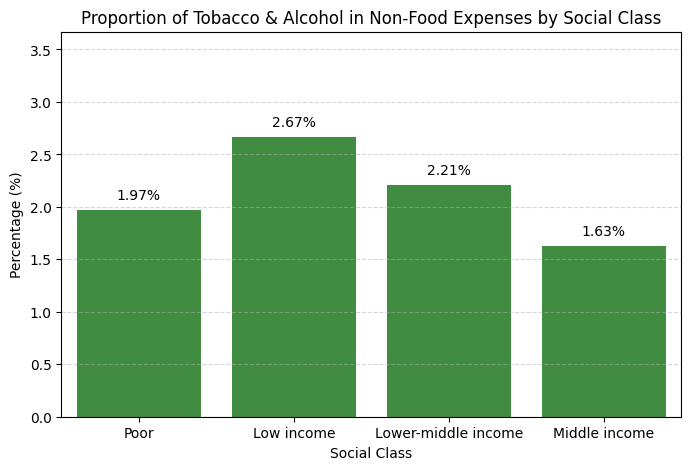

In [34]:
# Group by social class and mean percentage directly
percentages = final_fies.groupby('SOCIAL_CLASS', observed=False).apply(
    lambda x: ((x['TOBACCO'] + x['ALCOHOL']) / x['NFOOD']).mean() * 100, 
    include_groups=False
)

plt.figure(figsize=(8, 5))
sns.barplot(x=percentages.index, y=percentages.values, color='green', alpha=0.8)

for i, v in enumerate(percentages.values):
    plt.text(i, v + 0.1, f'{v:.2f}%', ha='center')

plt.title('Proportion of Tobacco & Alcohol in Non-Food Expenses by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, max(percentages.values) + 1) 
plt.show()


Proportion of Tobacco & Alcohol in Non-Food Expenses by Social Class

This visualization shows the proportion of tobacco and alcohol in non food expenses by social class. It shows lower-middle income, low income and poor social groups tend to allocate more budget for both products as compared to the middle-income social group. This may be influenced by events like celebrations or sad events where there is a culture to drink during those occations.

### **Insurance & Miscellaneous expenditure analysis and visualization**

##### Distribution of Insurance & Miscellaneous Expenses

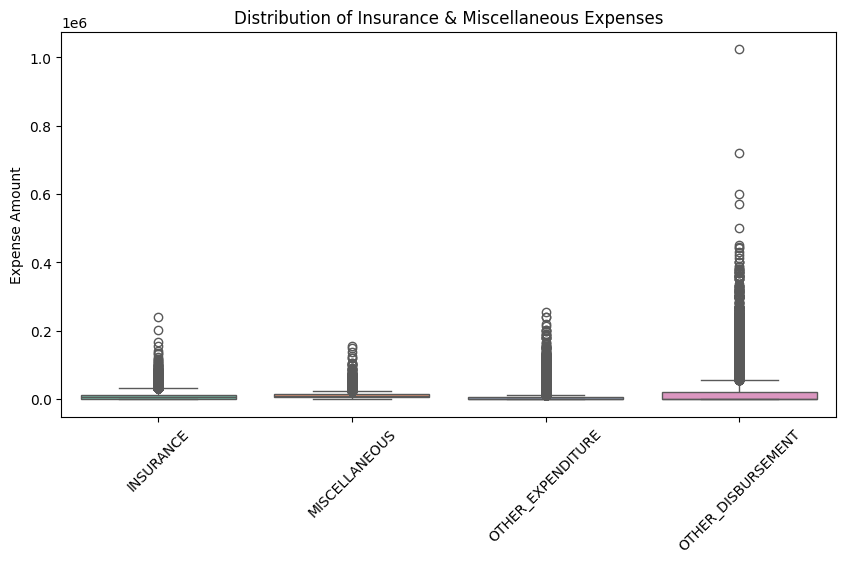

           INSURANCE  MISCELLANEOUS  OTHER_EXPENDITURE  OTHER_DISBURSEMENT
count   18848.000000   18848.000000       18848.000000        1.884800e+04
mean     8666.942434   11158.858553        6387.040429        2.197597e+04
std     12040.608436    7949.249707       16191.771556        4.771644e+04
min         0.000000     558.000000           0.000000        0.000000e+00
25%         0.000000    6366.000000           0.000000        0.000000e+00
50%      5160.000000    9439.500000         300.000000        0.000000e+00
75%     12480.000000   13725.500000        5000.000000        2.220000e+04
max    239630.000000  156164.000000      253584.000000        1.024000e+06


In [35]:
# Columns for analysis
columns = ['INSURANCE', 'MISCELLANEOUS', 'OTHER_EXPENDITURE', 'OTHER_DISBURSEMENT']

plt.figure(figsize=(10, 5))
sns.boxplot(data=final_fies[columns], palette="Set2")
plt.title("Distribution of Insurance & Miscellaneous Expenses")
plt.ylabel("Expense Amount")
plt.xticks(rotation=45)
plt.show()

# Summary statistics
print(final_fies[columns].describe())

-Presence of Outliers: Circles above each box indicate outliers, especially in OTHER_DISBURSEMENT, exceeding 2,000,000 PHP.

-Expense Concentration: Most expenses are low, with the median close to the bottom of each box.
Interquartile Range (IQR): The small boxes indicate most values fall within a narrow range.

-OTHER_DISBURSEMENT Variability: This category has the widest spread and extreme outliers.

-Comparison Across Categories: INSURANCE, MISCELLANEOUS, and OTHER_EXPENDITURE have similar distributions, while OTHER_DISBURSEMENT has significantly higher values.

-Potential Influences: Large outliers in OTHER_DISBURSEMENT may be due to one-time large expenses, business disbursements, or data errors.

##### Correlation Heatmap of Insurance & Miscellaneous Expenditures

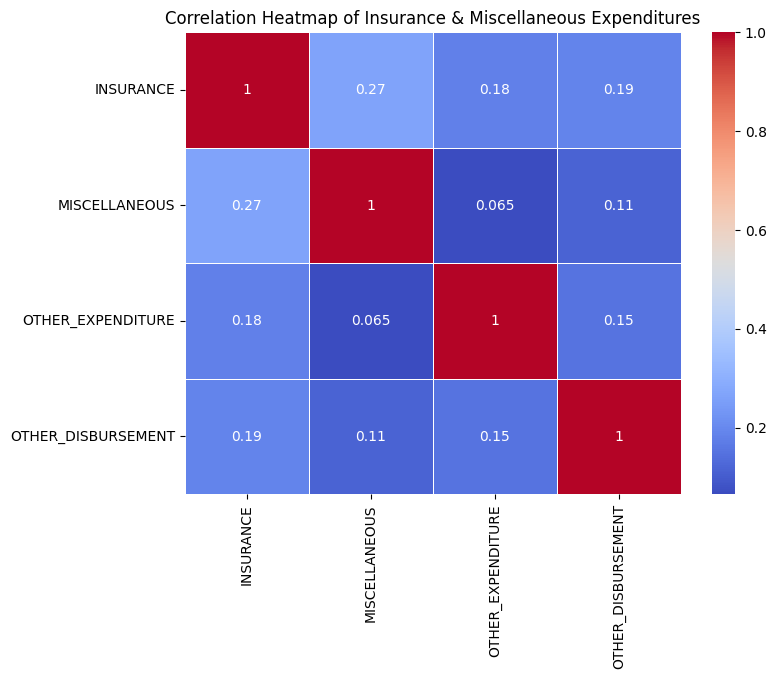

In [36]:
correlation_matrix = final_fies[columns].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Insurance & Miscellaneous Expenditures")
plt.show()


-Correlation Strength: INSURANCE and MISCELLANEOUS have the highest correlation (0.27).
Weak Relationships: Most correlations are below 0.3, indicating weak associations.

-Self-Correlation: Each variable has a perfect correlation (1) with itself.

-OTHER_EXPENDITURE & MISCELLANEOUS: Lowest correlation (0.065) suggests they are almost independent.

-INSURANCE vs. OTHER_DISBURSEMENT: Moderate correlation (0.27) implies a weak link.

-Color Interpretation: Darker red means higher correlation, while blue indicates weaker relationships.

##### Average Insurance & Miscellaneous Expenses by Social Class

C:\Users\edjin\AppData\Local\Temp\ipykernel_35292\3206006558.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spending = final_fies.groupby("SOCIAL_CLASS")[columns].mean().reset_index()


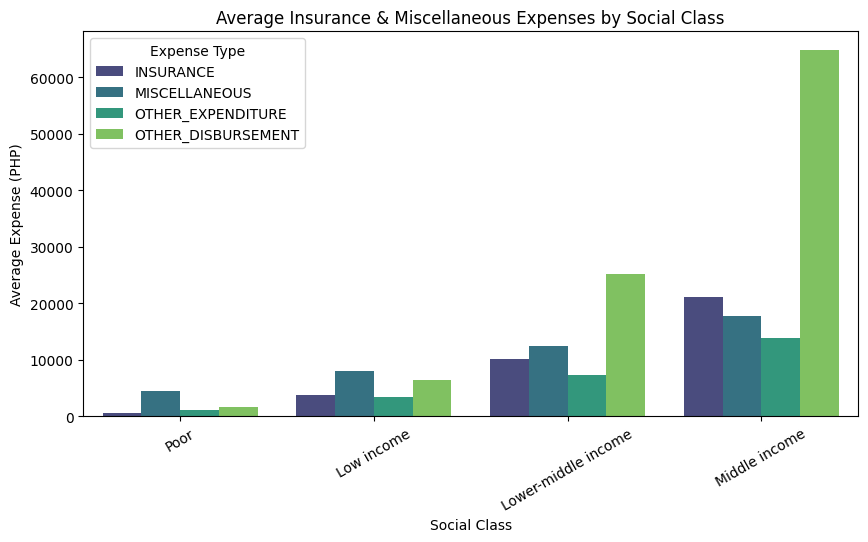

In [37]:
# Group by Social Class and compute the mean
avg_spending = final_fies.groupby("SOCIAL_CLASS")[columns].mean().reset_index()

# Melt dataframe for easier plotting
avg_spending_melted = avg_spending.melt(id_vars=["SOCIAL_CLASS"], var_name="Expense Type", value_name="Average Expense")


plt.figure(figsize=(10, 5))
sns.barplot(x="SOCIAL_CLASS", y="Average Expense", hue="Expense Type", data=avg_spending_melted, palette="viridis")
plt.title("Average Insurance & Miscellaneous Expenses by Social Class")
plt.xlabel("Social Class")
plt.ylabel("Average Expense (PHP)")
plt.xticks(rotation=30)
plt.legend(title="Expense Type")
plt.show()


-Expense Distribution: Middle-income groups have the highest insurance & miscellaneous expenses.
-Income Effect: Higher social classes spend significantly more on OTHER_DISBURSEMENT.

-Poor & Low Income: Lower expenses across all categories, except OTHER_DISBURSEMENT, which is still noticeable.

-Spending Growth: OTHER_DISBURSEMENT increases exponentially as social class rises.

-Comparison: INSURANCE, MISCELLANEOUS, and OTHER_EXPENDITURE increase steadily but at a lower rate.

### **Generate statistics and provide EDA**

##### Comparison of Average Income and Expenditure by Social Class

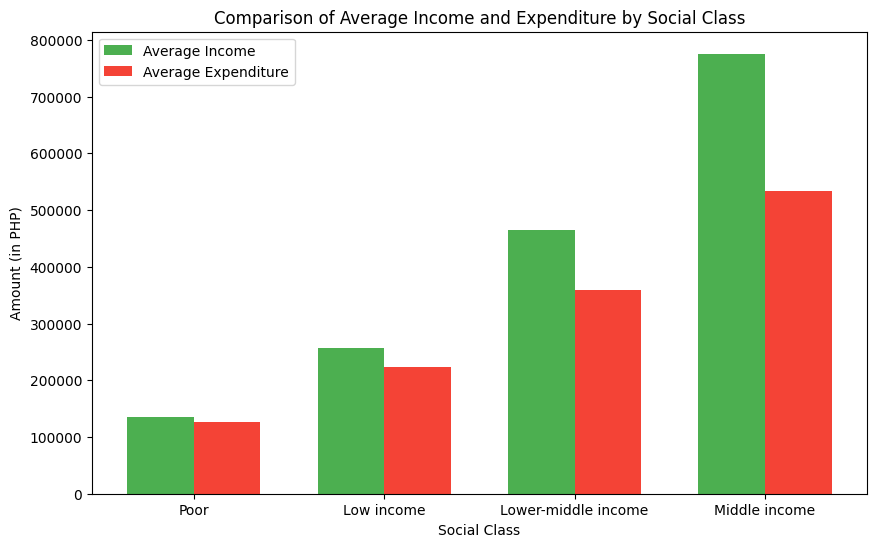

In [38]:
data = final_fies.groupby('SOCIAL_CLASS', observed=False)[['TOINC', 'TOTEX']].mean().reset_index()

bar_width = 0.35
x = np.arange(len(data['SOCIAL_CLASS']))


plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, data['TOINC'], width=bar_width, label='Average Income', color='#4CAF50')
plt.bar(x + bar_width/2, data['TOTEX'], width=bar_width, label='Average Expenditure', color='#F44336')
plt.xticks(x, data['SOCIAL_CLASS'])  
plt.title('Comparison of Average Income and Expenditure by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Amount (in PHP)')
plt.legend()
plt.show()


Comparison of Average Income and Expenditure by Social Class

This visualization shows the comparison between average income and expenses by social group. It shows a higher average for income in all social classes which can mean people in NCR can budget their money wisely.

##### Average Expenditures by Social Class

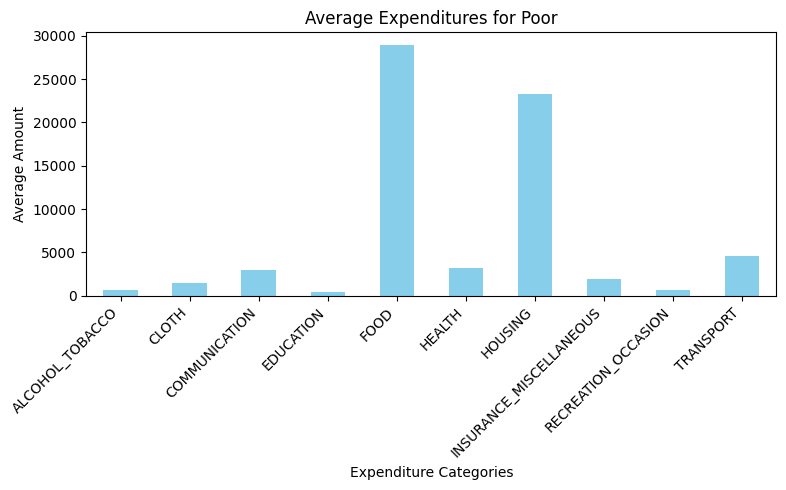

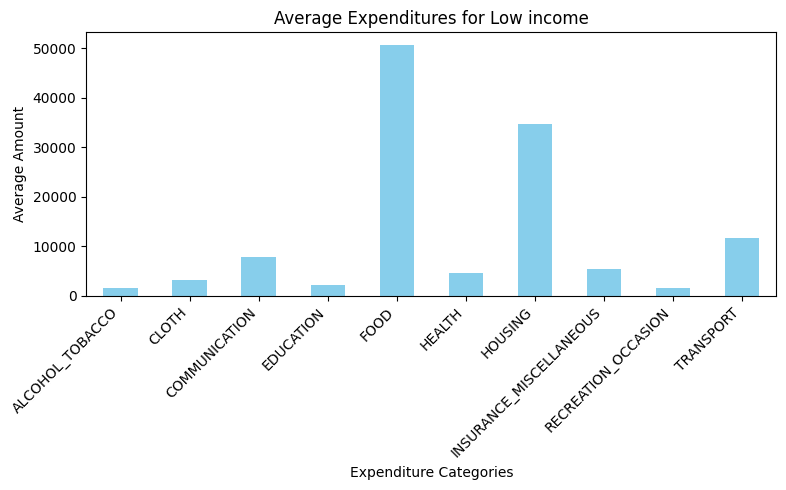

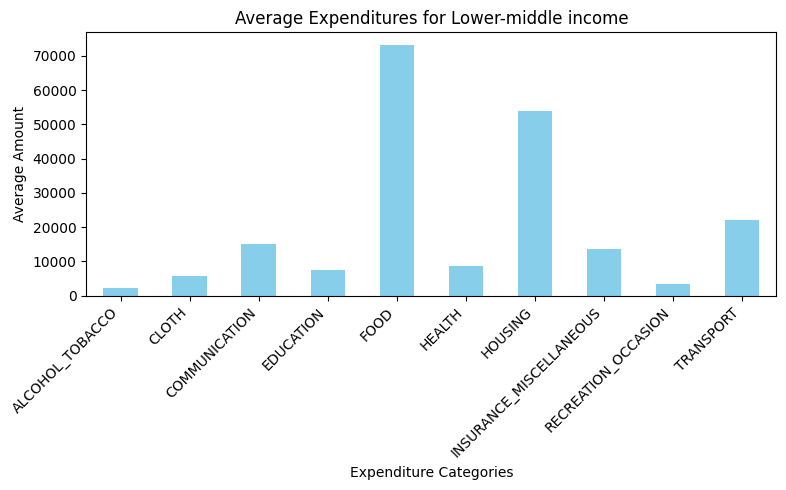

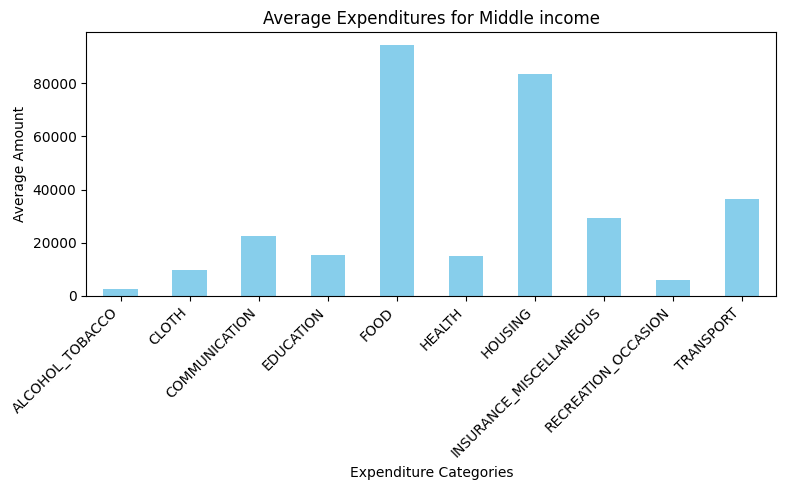

In [39]:
avg_expenditure = final_fies.groupby('SOCIAL_CLASS', observed=False).agg({
    'ALCOHOL': 'mean', 'TOBACCO': 'mean',
    'CLOTH': 'mean',
    'COMMUNICATION': 'mean',
    'EDUCATION': 'mean',
    'FOOD_HOME': 'mean', 'FOOD_OUTSIDE': 'mean',
    'HEALTH': 'mean',
    'HOUSING_WATER': 'mean', 'FURNISHING': 'mean',
    'INSURANCE': 'mean', 'MISCELLANEOUS': 'mean', 'OTHER_EXPENDITURE': 'mean', 'OTHER_DISBURSEMENT': 'mean',
    'RECREATION': 'mean', 'OCCASION': 'mean',
    'TRANSPORT': 'mean'
})

# Combine related categories
avg_expenditure['ALCOHOL_TOBACCO'] = avg_expenditure[['ALCOHOL', 'TOBACCO']].mean(axis=1)
avg_expenditure['FOOD'] = avg_expenditure[['FOOD_HOME', 'FOOD_OUTSIDE']].mean(axis=1)
avg_expenditure['HOUSING'] = avg_expenditure[['HOUSING_WATER', 'FURNISHING']].mean(axis=1)
avg_expenditure['RECREATION_OCCASION'] = avg_expenditure[['RECREATION', 'OCCASION']].mean(axis=1)
avg_expenditure['INSURANCE_MISCELLANEOUS'] = avg_expenditure[['INSURANCE','MISCELLANEOUS', 'OTHER_EXPENDITURE', 'OTHER_DISBURSEMENT']].mean(axis=1)


avg_expenditure = avg_expenditure[[
    'ALCOHOL_TOBACCO', 'CLOTH', 'COMMUNICATION', 'EDUCATION',
    'FOOD', 'HEALTH', 'HOUSING', 'INSURANCE_MISCELLANEOUS', 'RECREATION_OCCASION', 'TRANSPORT'
]]


for social_class in avg_expenditure.index:
    plt.figure(figsize=(8, 5))
    avg_expenditure.loc[social_class].plot(kind='bar', color='skyblue')
    plt.title(f'Average Expenditures for {social_class}')
    plt.ylabel('Average Amount')
    plt.xlabel('Expenditure Categories')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [40]:
palette = sns.color_palette("coolwarm", len(data.columns) - 1)

In [41]:
avg_expenditure

,ALCOHOL_TOBACCO,CLOTH,COMMUNICATION,EDUCATION,FOOD,HEALTH,HOUSING,INSURANCE_MISCELLANEOUS,RECREATION_OCCASION,TRANSPORT
SOCIAL_CLASS,,,,,,,,,,
Poor,611.841302,1413.361934,2983.595944,426.107644,28963.258237,3169.778471,23280.247270,1927.898986,700.159906,4559.000000
Low income,1559.512167,3119.901459,7814.419336,2175.217677,50656.655787,4519.693793,34695.025029,5450.419837,1574.980263,11715.892162
Lower-middle income,2170.237679,5865.717120,15168.182009,7437.605997,73192.258752,8757.949950,54023.353765,13752.200254,3468.471337,22105.436225
Middle income,2547.812810,9569.815765,22545.943563,15389.715019,94520.057206,15140.623601,83445.634562,29372.358675,5774.847481,36300.589552


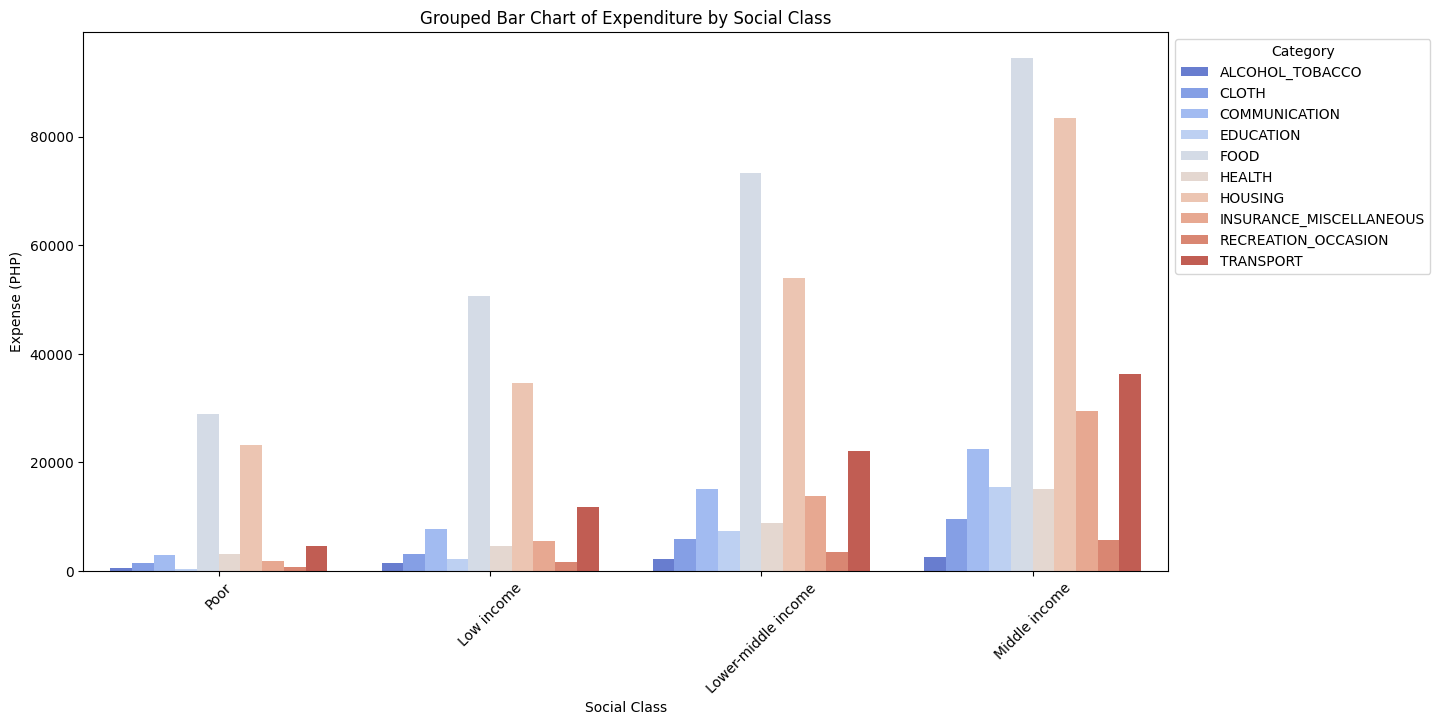

In [42]:
avg_expenditure = avg_expenditure.reset_index().rename(columns={"index": "SOCIAL_CLASS"})

data_melted = avg_expenditure.melt(id_vars=["SOCIAL_CLASS"], var_name="Category", value_name="Expense")

palette = sns.color_palette("coolwarm", len(avg_expenditure.columns) - 1)

plt.figure(figsize=(14, 7))
sns.barplot(data=data_melted, x="SOCIAL_CLASS", y="Expense", hue="Category", palette=palette)
plt.title("Grouped Bar Chart of Expenditure by Social Class")
plt.xticks(rotation=45)
plt.xlabel("Social Class")
plt.ylabel("Expense (PHP)")
plt.legend(title="Category", bbox_to_anchor=(1, 1))
plt.show()

Average Expenditures by Social Class

This visualization shows average expenditures by social class. it shows for all social classes that FOOD, HOUSING and TRANSPORT are the main expenditures. There is also a trend of higher average values for other details such as RECREATION_OCCASION which can mean the better social class standing, the more money can allocate for other necessities like cloths and budget for relaxation and occasions.